<a href="https://www.kaggle.com/code/shubhamgupta012/bagging?scriptVersionId=128072152" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [6]:
df = df[df['Species']!=0][['SepalWidthCm','PetalLengthCm','Species']] 

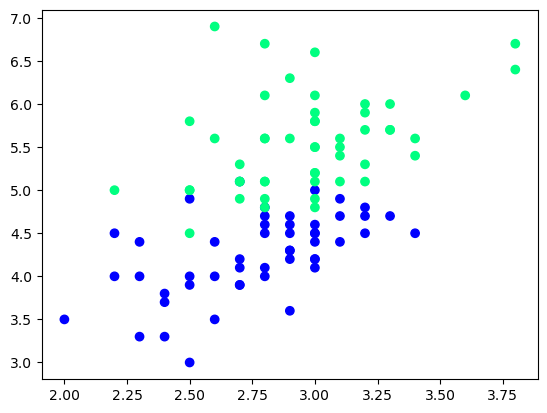

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [8]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [9]:
X_test = df_val.iloc[:,0:2].values
Y_test = df_val.iloc[:,-1].values

In [10]:
X_test,Y_test

(array([[3.1, 4.7],
        [3.3, 5.7],
        [2.7, 5.1],
        [2.3, 3.3],
        [2.2, 5. ]]),
 array([1, 2, 2, 1, 2]))

In [11]:
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2]
Y= df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
55,2.8,4.5,1
99,2.8,4.1,1
116,3.0,5.5,2
144,3.3,5.7,2
107,2.9,6.3,2
57,2.4,3.3,1
115,3.2,5.3,2
132,2.8,5.6,2


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [13]:
dt_bag1 = DecisionTreeClassifier()

In [14]:
def evaluate(clf,X,y):
    clf.fit(X,Y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, Y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(Y_test,y_pred))

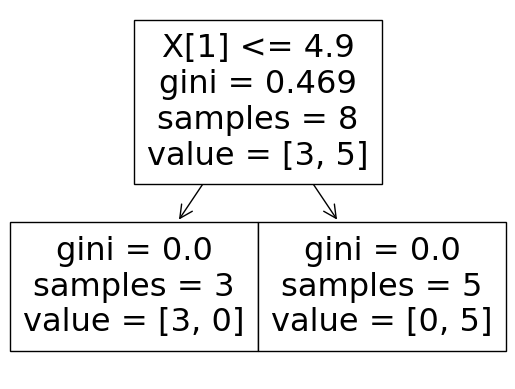

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1.0


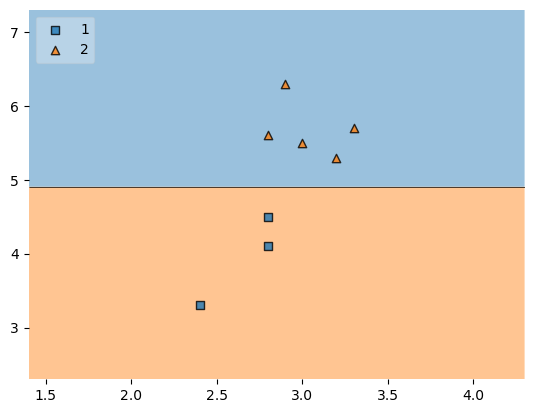

In [15]:
evaluate(dt_bag1,X,Y)

In [16]:
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2]
Y= df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
123,2.7,4.9,2
107,2.9,6.3,2
115,3.2,5.3,2
115,3.2,5.3,2
57,2.4,3.3,1
57,2.4,3.3,1
99,2.8,4.1,1
123,2.7,4.9,2


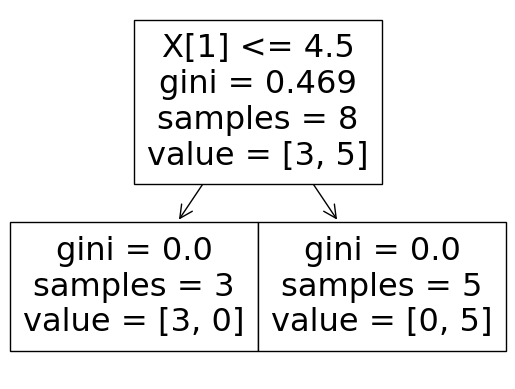

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8


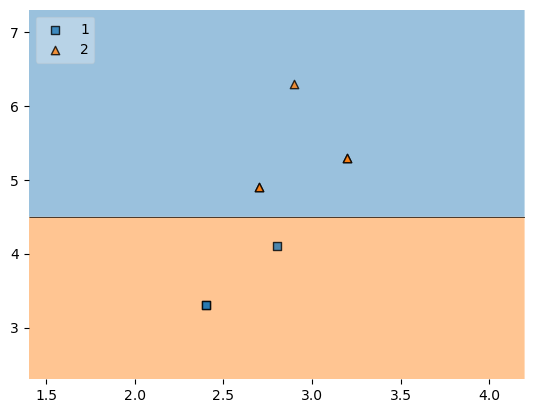

In [17]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,Y)

In [18]:
print("hi")

hi
